<a href="https://colab.research.google.com/github/hansuho113/SwUniv_CancerAnalysis/blob/main/Colab_Notebook/Suho/drug_gene_pca30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  
drive.mount("/content/drive")

Mounted at /content/drive


# Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder

# Load Data

## measure_of_response:
- ['unknown', 'Complete Response', 'Partial Response', 'Clinical Progressive Disease', 'Stable Disease']

## therapy_response:
- ['unknown', 'response', 'no response']

In [3]:
original_df = pd.read_csv('/content/drive/MyDrive/SW21Project/drug_gene_preprocessed.csv')

# Data Preprocessing
## one_hot_encoding

In [4]:
# one_hot_encoding
df = original_df.copy()
df = pd.get_dummies(data=df,
                    columns=['regimen_indication', 'therapy_types', 'drug_name_'])

In [5]:
df.drop(['measure_of_response', 'bcr_patient_barcode'], axis=1, inplace=True)

In [6]:
df.head(1)

,index,therapy_response,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2M|2,A2ML1|144568,A4GALT|53947,A4GNT|51146,AAA1|404744,...,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,regimen_indication_ADJUVANT,"regimen_indication_OTHER, SPECIFY IN NOTES",regimen_indication_PROGRESSION,regimen_indication_RECURRENCE,regimen_indication_unknown,therapy_types_Ancillary,therapy_types_Chemotherapy,therapy_types_Immunotherapy,"therapy_types_Other, specify in notesAncillary","therapy_types_Other, specify in notesAncillary Agent","therapy_types_Other, specify in notesancillary",therapy_types_Targeted Molecular therapy,therapy_types_unknown,drug_name__bevacizumab,drug_name__capecitabine,drug_name__fluorouracil,drug_name__folinic,drug_name__irinotecan,drug_name__oxaliplatin
0,TCGA-A6-6648-01A-11R-1774-07,unknown,0.0,14.1703,12.2592,324.308,713.85,0.0,152.732,0.5083,0.0,0.0,0.0,3.0496,2.033,0.0,0.0,0.0,0.0,0.0,0.0,732.147,12.4524,0.0,31.5121,0.0,0.0,2.033,0.5083,506.48,0.5083,6.7929,191.614,6.8615,101.741,4753.24,0.2541,48.0305,0.0,0.2541,...,134.435,1.7789,518.678,0.0,309.022,240.661,703.939,488.437,110.066,233.799,892.503,940.455,1146.63,66.8361,558.577,988.31,1.0165,1029.22,2791.87,2283.1,1205.59,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# keras sequential model
- ## split the data to feature and target

In [7]:
data = np.array(df[df.columns.difference(["index", 'therapy_response'])])
target = np.array(df.therapy_response)

np.asarray(data).astype('float32')

encoder = LabelEncoder()
encoder.fit(target)
labels = encoder.transform(target)

target = labels

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, target)
print(X_train.shape[1:])

(20550,)


In [9]:
inputs = keras.Input(shape=X_train.shape[1:])
dense = layers.Dense(100, activation='relu')

x = dense(inputs)
x = layers.Dense(100, activation='relu')(x)

x = layers.Dense(100, activation='relu')(x)

outputs = layers.Dense(3, activation='softmax')(x)

In [10]:
model = keras.Model(inputs=inputs, outputs=outputs, name='drug_res_prediction')
model.summary()

Model: "drug_res_prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20550)]           0         
_________________________________________________________________
dense (Dense)                (None, 100)               2055100   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 2,075,603
Trainable params: 2,075,603
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 141ms/step - loss: 5777.2680 - accuracy: 0.4655 - val_loss: 2902.3313 - val_accuracy: 0.6486
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: 2399.9677 - accuracy: 0.6048 - val_loss: 927.3704 - val_accuracy: 0.7027
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 1329.2504 - accuracy: 0.6453 - val_loss: 2094.3789 - val_accuracy: 0.6486
Epoch 4/100
5/5 [==============================] - 0s 21ms/step - loss: 1970.6217 - accuracy: 0.6722 - val_loss: 1149.3113 - val_accuracy: 0.6486
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 692.7350 - accuracy: 0.6545 - val_loss: 590.6730 - val_accuracy: 0.7568
Epoch 6/100
5/5 [==============================] - 0s 21ms/step - loss: 646.0761 - accuracy: 0.6906 - val_loss: 510.5706 - val_accuracy: 0.7027
Epoch 7/100
5/5 [==============================] - 0s 24ms/step - loss: 463.9572 - accuracy: 0.6621 - val_loss: 633.1890 - val_a

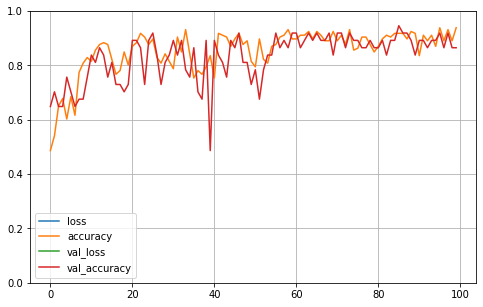

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)    # 수직축 범위 [0-1] 사이로 설정
plt.show()

In [35]:
df_pca = original_df.copy()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
# 유전자 명칭 리스트
# 표준화 이후의 데이터프레임 컬럼명으로 사용됨
features_gene = df_pca.columns.tolist()[7:]

In [38]:
x = df_pca.drop(['index','bcr_patient_barcode', 'measure_of_response',
                 'regimen_indication', 'therapy_types', 'drug_name_', 'therapy_response'], axis = 1).values
y = df_pca['therapy_response'].values
sc = StandardScaler()

x = sc.fit_transform(x)

pd.DataFrame(x, columns=features_gene)

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,?|340602,?|388795,?|390284,?|391343,?|391714,?|404770,?|441362,?|442388,?|553137,?|57714,?|645851,?|652919,?|653553,?|728045,?|728603,?|728788,?|729884,?|8225,?|90288,A1BG|1,A1CF|29974,A2BP1|54715,A2LD1|87769,A2M|2,A2ML1|144568,A4GALT|53947,A4GNT|51146,AAA1|404744,AAAS|8086,AACS|65985,...,ZPBP2|124626,ZPLD1|131368,ZRANB1|54764,ZRANB2|9406,ZRANB3|84083,ZRSR2|8233,ZSCAN10|84891,ZSCAN1|284312,ZSCAN12|9753,ZSCAN12P1|221584,ZSCAN16|80345,ZSCAN18|65982,ZSCAN20|7579,ZSCAN21|7589,ZSCAN22|342945,ZSCAN23|222696,ZSCAN2|54993,ZSCAN29|146050,ZSCAN4|201516,ZSCAN5A|79149,ZSCAN5B|342933,ZSWIM1|90204,ZSWIM2|151112,ZSWIM3|140831,ZSWIM4|65249,ZSWIM5|57643,ZSWIM6|57688,ZSWIM7|125150,ZUFSP|221302,ZW10|9183,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,-0.190619,0.612719,0.182336,0.400231,-0.588096,0.0,-0.424833,0.184543,0.0,0.0,-0.386312,0.014375,-0.953063,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,0.807210,0.551537,-0.568961,-0.753731,0.0,-0.11134,2.787643,-0.288566,-0.573604,-0.486848,-0.974413,0.032643,-0.303836,-1.005056,-0.424093,-0.379231,-1.090833,-0.167218,-0.349443,-0.481766,-0.152331,...,-0.522328,-0.117867,0.589004,0.204334,2.069151,-0.547001,-0.197396,-0.248548,1.686383,-0.195357,0.295007,0.326969,1.688003,-0.550475,0.992579,-0.268786,-0.554628,1.623502,-0.412562,2.635629,-0.048689,0.078181,-0.128731,0.715399,-0.951400,1.772808,0.360900,-0.920263,0.757383,2.553023,2.250665,0.560567,0.437500,0.528619,-0.198317,0.082900,2.051187,-1.288201,0.508515,3.743657
1,-0.190619,0.612719,0.182336,0.400231,-0.588096,0.0,-0.424833,0.184543,0.0,0.0,-0.386312,0.014375,-0.953063,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,0.807210,0.551537,-0.568961,-0.753731,0.0,-0.11134,2.787643,-0.288566,-0.573604,-0.486848,-0.974413,0.032643,-0.303836,-1.005056,-0.424093,-0.379231,-1.090833,-0.167218,-0.349443,-0.481766,-0.152331,...,-0.522328,-0.117867,0.589004,0.204334,2.069151,-0.547001,-0.197396,-0.248548,1.686383,-0.195357,0.295007,0.326969,1.688003,-0.550475,0.992579,-0.268786,-0.554628,1.623502,-0.412562,2.635629,-0.048689,0.078181,-0.128731,0.715399,-0.951400,1.772808,0.360900,-0.920263,0.757383,2.553023,2.250665,0.560567,0.437500,0.528619,-0.198317,0.082900,2.051187,-1.288201,0.508515,3.743657
2,-0.190619,0.612719,0.182336,0.400231,-0.588096,0.0,-0.424833,0.184543,0.0,0.0,-0.386312,0.014375,-0.953063,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,0.807210,0.551537,-0.568961,-0.753731,0.0,-0.11134,2.787643,-0.288566,-0.573604,-0.486848,-0.974413,0.032643,-0.303836,-1.005056,-0.424093,-0.379231,-1.090833,-0.167218,-0.349443,-0.481766,-0.152331,...,-0.522328,-0.117867,0.589004,0.204334,2.069151,-0.547001,-0.197396,-0.248548,1.686383,-0.195357,0.295007,0.326969,1.688003,-0.550475,0.992579,-0.268786,-0.554628,1.623502,-0.412562,2.635629,-0.048689,0.078181,-0.128731,0.715399,-0.951400,1.772808,0.360900,-0.920263,0.757383,2.553023,2.250665,0.560567,0.437500,0.528619,-0.198317,0.082900,2.051187,-1.288201,0.508515,3.743657
3,-0.190619,2.355440,1.679913,-0.039112,1.072116,0.0,-1.029376,0.120756,0.0,0.0,-0.386312,-0.427309,1.958145,-0.279173,-0.352749,0.0,-0.064018,0.0,-0.188845,1.538813,-1.096021,-0.568961,0.039041,0.0,-0.11134,0.400810,-0.385321,-0.275360,-0.492827,-0.312413,-1.588260,-0.541620,-0.143505,-0.590694,-0.393648,-0.195609,0.147207,1.725081,-0.159360,-0.474851,...,0.348639,-0.500806,-0.683911,-0.870331,-0.771563,-1.145629,-0.197396,-0.300715,-1.227692,0.997164,-0.789925,-0.836401,-0.373126,-0.890156,-0.378757,-0.555232,-0.449403,-0.140798,2.018568,0.686345,-0.017373,-1.227721,-0.128731,-1.328362,-1.141674,-0.777104,-1.057405,-0.837330,0.208813,1.682164,0.596063,1.186225,0.022706,-0.647188,-0.802103,-0.241006,-0.091526,0.008861,-0.597441,-0.462317
4,-0.190619,0.234558,-0.137600,1.009371,-0.941700,0.0,0.066172,0.134988,0.0,0.0,-0.386312,-0.288443,-0.598173,-0.279173,-0.352749,0.0,

In [39]:
column_30d = ['principal component1','principal component2','principal component3','principal component4','principal component5',
              'principal component6','principal component7','principal component8','principal component9','principal component10',
              'principal component11','principal component12','principal component13','principal component14','principal component15',
              'principal component16','principal component17','principal component18','principal component19','principal component20',
              'principal component21','principal component22','principal component23','principal component24','principal component25',
              'principal component26','principal component27','principal component28','principal component29','principal component30']

In [45]:
pca_30d = PCA(n_components = 30)
principalComponents_30d = pca_30d.fit_transform(x)
principalDf_30d = pd.DataFrame(data = principalComponents_30d, columns = column_30d)

In [42]:
principalDf_30d.head(2)

,principal component1,principal component2,principal component3,principal component4,principal component5,principal component6,principal component7,principal component8,principal component9,principal component10,principal component11,principal component12,principal component13,principal component14,principal component15,principal component16,principal component17,principal component18,principal component19,principal component20,principal component21,principal component22,principal component23,principal component24,principal component25,principal component26,principal component27,principal component28,principal component29,principal component30
0,-21.005803,-37.656768,-33.837386,4.666111,-47.085306,-17.416979,-5.01928,-38.142226,-19.000333,35.329531,-3.741604,-15.98468,24.24058,-4.932587,-8.219137,-3.631153,7.375003,22.751481,-20.366456,5.397072,-12.586933,49.262622,18.106844,-3.23698,20.133996,2.173952,-4.171427,-7.496083,-12.461905,17.493865
1,-21.005803,-37.656768,-33.837386,4.666111,-47.085306,-17.416979,-5.01928,-38.142226,-19.000333,35.329531,-3.741604,-15.98468,24.24058,-4.932587,-8.219137,-3.631153,7.375003,22.751481,-20.366456,5.397072,-12.586933,49.262622,18.106844,-3.23698,20.133996,2.173952,-4.171427,-7.496083,-12.461905,17.493865


In [46]:
data = principalDf_30d

In [47]:
target = np.array(df_pca.therapy_response)

encoder = LabelEncoder()
encoder.fit(target)
labels = encoder.transform(target)

target = labels

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, target)
print(X_train.shape[1:])

(30,)


In [54]:
inputs = keras.Input(shape=X_train.shape[1:])
dense = layers.Dense(50, activation='relu')

x = dense(inputs)
x = layers.Dense(50, activation='relu')(x)

x = layers.Dense(50, activation='relu')(x)

outputs = layers.Dense(3, activation='softmax')(x)

In [55]:
model = keras.Model(inputs=inputs, outputs=outputs, name='drug_res_prediction')
model.summary()

Model: "drug_res_prediction"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 153       
Total params: 6,803
Trainable params: 6,803
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [57]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 17.9242 - accuracy: 0.2523 - val_loss: 9.3336 - val_accuracy: 0.2162
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 8.3289 - accuracy: 0.3234 - val_loss: 3.1335 - val_accuracy: 0.3784
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 3.0721 - accuracy: 0.5431 - val_loss: 2.5733 - val_accuracy: 0.6216
Epoch 4/100
5/5 [==============================] - 0s 11ms/step - loss: 2.1276 - accuracy: 0.6483 - val_loss: 2.3928 - val_accuracy: 0.6486
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 1.7241 - accuracy: 0.7051 - val_loss: 1.5875 - val_accuracy: 0.6757
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.6776 - accuracy: 0.8043 - val_loss: 0.8311 - val_accuracy: 0.7568
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 0.4608 - accuracy: 0.8421 - val_loss: 0.6506 - val_accuracy: 0.8108
Epoch 8/100
5/5 [==

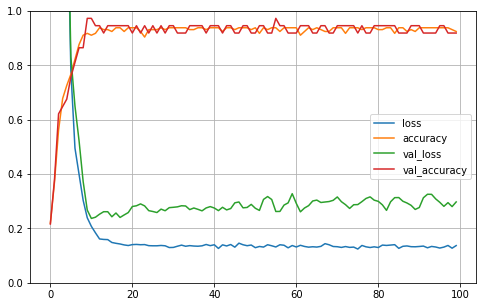

In [58]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)    # 수직축 범위 [0-1] 사이로 설정
plt.show()